In [35]:
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("D:\\Data science\\myntra_products_catalog.csv")
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [38]:
df.shape


(12491, 8)

In [39]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [40]:
df['ProductName'].unique()

array(['DKNY Unisex Black & Grey Printed Medium Trolley Bag',
       'EthnoVogue Women Beige & Grey Made to Measure Custom Made Kurta Set with Jacket',
       'SPYKAR Women Pink Alexa Super Skinny Fit High-Rise Clean Look Stretchable Cropped Jeans',
       ...,
       '612 league Girls Navy Blue & White Printed Regular Fit Denim Shorts',
       'Bvlgari Men Aqva Pour Homme Marine Eau de Toilette 150ml',
       'Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt'],
      dtype=object)

In [41]:
df['ProductBrand'].unique()

array(['DKNY', 'EthnoVogue', 'SPYKAR', 'Raymond', 'Parx', 'SHOWOFF',
       'Kenneth Cole', 'Police', 'Vishudh', 'Being Human', 'Homesake',
       'SEJ by Nisha Gupta', 'YAK YAK', 'PARFAIT', 'Michael Kors',
       'HIGHLANDER', 'JEWEL JUNCTION', 'ID', 'Story@home',
       'Gini and Jony', 'Sera', 'AccessHer', 'Alcis',
       'Difference of Opinion', 'Tokyo Talkies', 'ANNA SUI',
       'her by invictus', 'Soie', 'Lara Karen', 'Urban Dog', 'ahilya',
       'VASTRAMAY', 'Campus Sutra', 'FIDO DIDO', 'MIAH Decor', 'BuckleUp',
       'Peter England', 'AIGNER', 'Lady Lyka', 'Park Avenue', 'Roadster',
       'U.S. Polo Assn. Denim Co.', 'Sweet Dreams', 'Kazo', 'Stylo Bug',
       'Bvlgari', 'Qraa Men', 'GAS', 'WITH', 'ZUSH', 'JBN Creation',
       'U.S. Polo Assn. Kids', 'DressBerry', 'ColorPlus', 'Lakme',
       'Allen Solly Woman', 'Palm Tree', 'Arrow', 'DAVID BECKHAM',
       'MANGO', 'Carrera', 'ROMEE', 'TAYHAA', 'Ishin', 'Shoe Couture',
       'HARBORNBAY', 'Keds', 'Rozia', 'Aj DEZInES', 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [43]:
df['ProductBrand'].value_counts()

Indian Terrain                  971
Puma                            345
Pepe Jeans                      340
AURELIA                         307
Flying Machine                  301
                               ... 
Johnny Bravo by Kook N Keech      1
Allen Solly Sport                 1
HAMMER                            1
CUTECUMBER                        1
Stupid Cupid                      1
Name: ProductBrand, Length: 677, dtype: int64

<AxesSubplot:xlabel='ProductBrand'>

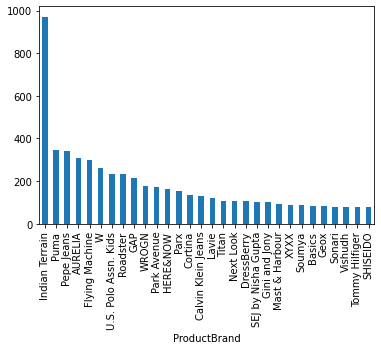

In [44]:
df1=df.groupby('ProductBrand')['ProductID'].count().sort_values(ascending=False).head(30)
df1.plot.bar()

<AxesSubplot:ylabel='ProductID'>

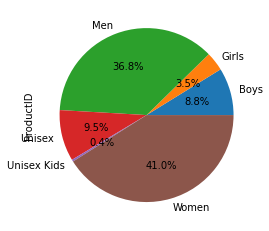

In [45]:
df.groupby('Gender')['ProductID'].count().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Frequency'>

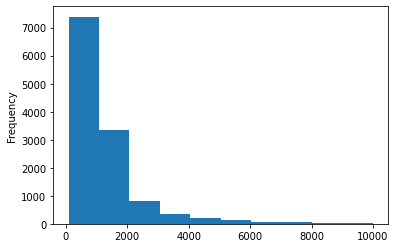

In [46]:
df2=df[df['Price (INR)']<10000]
df2['Price (INR)'].plot.hist()

<AxesSubplot:xlabel='PrimaryColor'>

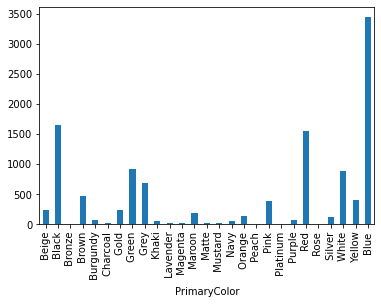

In [47]:
df.groupby('PrimaryColor')['ProductID'].count().plot.bar()

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string

list_stopwords = set(stopwords.words('english'))

In [49]:
df_nlp=df.copy()

In [50]:
df_nlp['ProductName2'] = df_nlp['ProductName'].str.lower()
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(word_tokenize)
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['ProductName2'] = df_nlp['ProductName2'].apply(lambda x : [word for word in x if len(word) > 1])

In [51]:
df_nlp['Description'] = df_nlp['Description'].str.lower()
df_nlp['Description'] = df_nlp['Description'].apply(word_tokenize)
df_nlp['Description'] = df_nlp['Description'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['Description'] = df_nlp['Description'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['Description'] = df_nlp['Description'].apply(lambda x : [word for word in x if len(word) > 1])

In [52]:
df_nlp

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,ProductName2
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"[black, grey, printed, medium, trolley, bag, s...",Black,"[dkny, unisex, black, grey, printed, medium, t..."
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,"[beige, grey, made, measure, kurta, churidar, ...",Beige,"[ethnovogue, women, beige, grey, made, measure..."
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,"[pink, coloured, wash, 5pocket, highrise, crop...",Pink,"[spykar, women, pink, alexa, super, skinny, fi..."
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,"[blue, selfdesign, bandhgala, suitblue, selfde...",Blue,"[raymond, men, blue, selfdesign, singlebreaste..."
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"[brown, offwhite, printed, casual, shirt, spre...",White,"[parx, men, brown, offwhite, slim, fit, printe..."
...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"[black, dark, wash, 5pocket, lowrise, jeans, c...",Black,"[pepe, jeans, men, black, hammock, slim, fit, ..."
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"[pair, goldtoned, open, toe, heels, regular, s...",Gold,"[mochi, women, goldtoned, solid, heels]"
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,"[navy, blue, white, printed, midrise, denim, s...",Blue,"[612, league, girls, navy, blue, white, printe..."
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,"[bvlgari, men, aqva, pour, homme, marine, eau,...",NaN,"[bvlgari, men, aqva, pour, homme, marine, eau,..."


In [53]:
df_product=df_nlp['ProductName2'].explode()
df_product=pd.DataFrame(df_product)

In [54]:
pd.set_option('display.max_rows', 150)

In [55]:
df_product.groupby('ProductName2')['ProductName2'].count().sort_values(ascending=False).head(50)

ProductName2
men            4433
women          3910
blue           3442
solid          3114
fit            3075
printed        2620
black          2008
shirt          1668
slim           1562
tshirt         1449
white          1416
navy           1405
casual         1372
jeans          1210
regular        1135
boys           1082
grey           1060
green          1007
indian          987
terrain         971
kurta           892
red             874
checked         787
polo            748
neck            746
round           703
pink            686
brown           656
design          639
look            637
stretchable     584
straight        572
top             570
yellow          565
striped         550
clean           531
midrise         517
dress           447
collar          424
beige           419
girls           419
trousers        418
set             417
formal          406
sneakers        397
self            381
puma            361
jacket          353
skinny          351
pack   

In [56]:
import sys
print(sys.executable)

D:\anaconda\envs\tensorflow\python.exe


In [57]:
from wordcloud import WordCloud


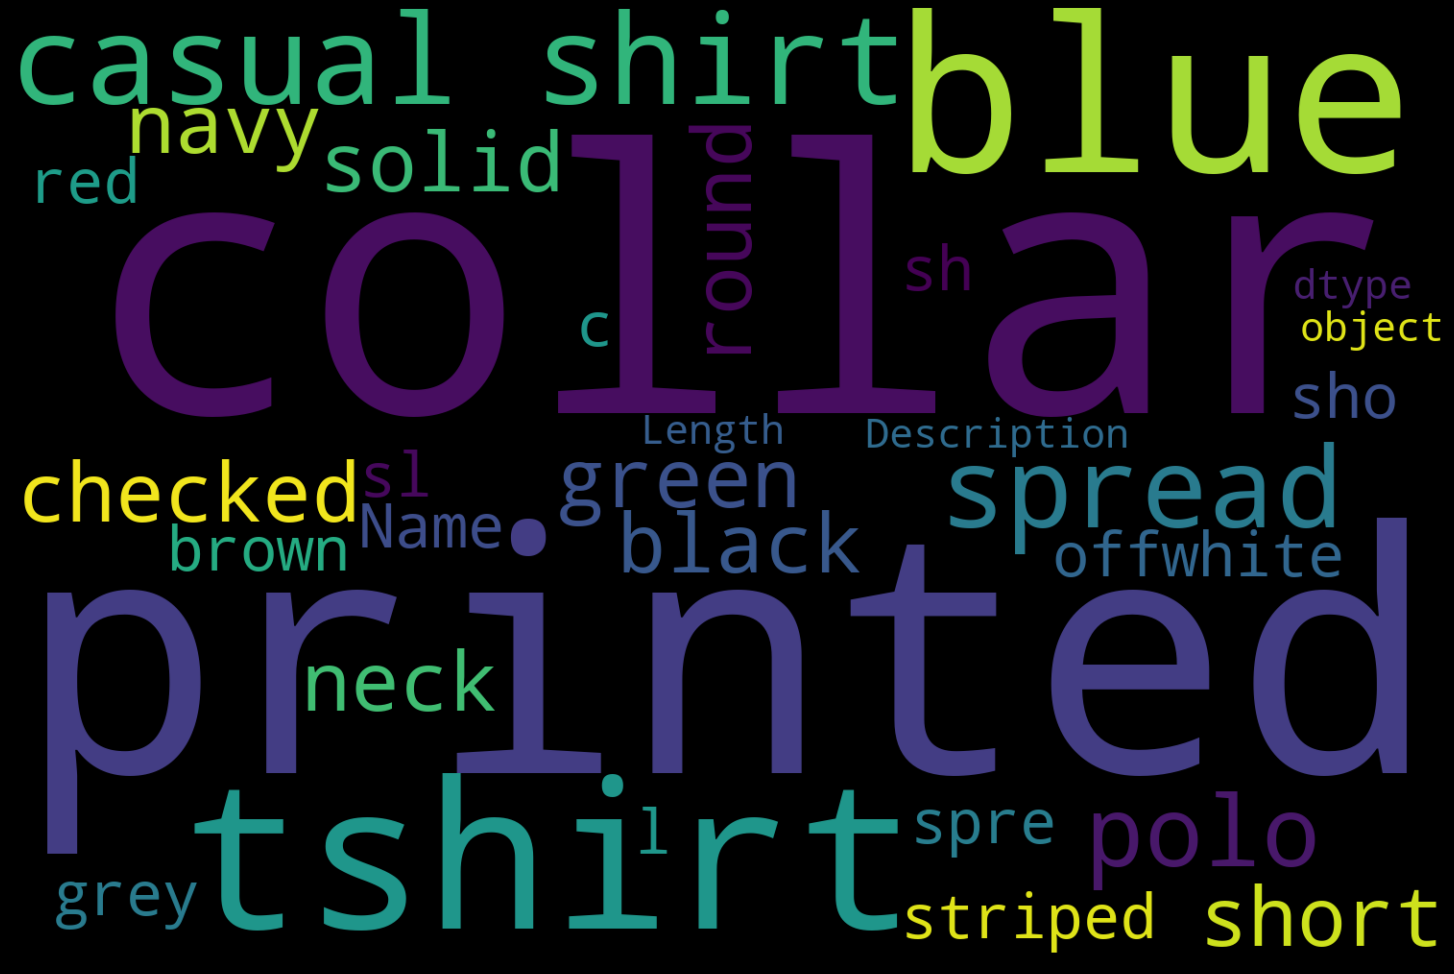

In [58]:
df_shirt=df_nlp[df_nlp['ProductName'].str.contains('shirt|Shirt')]
text1 = df_shirt['Description']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = list_stopwords).generate(str(text1))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

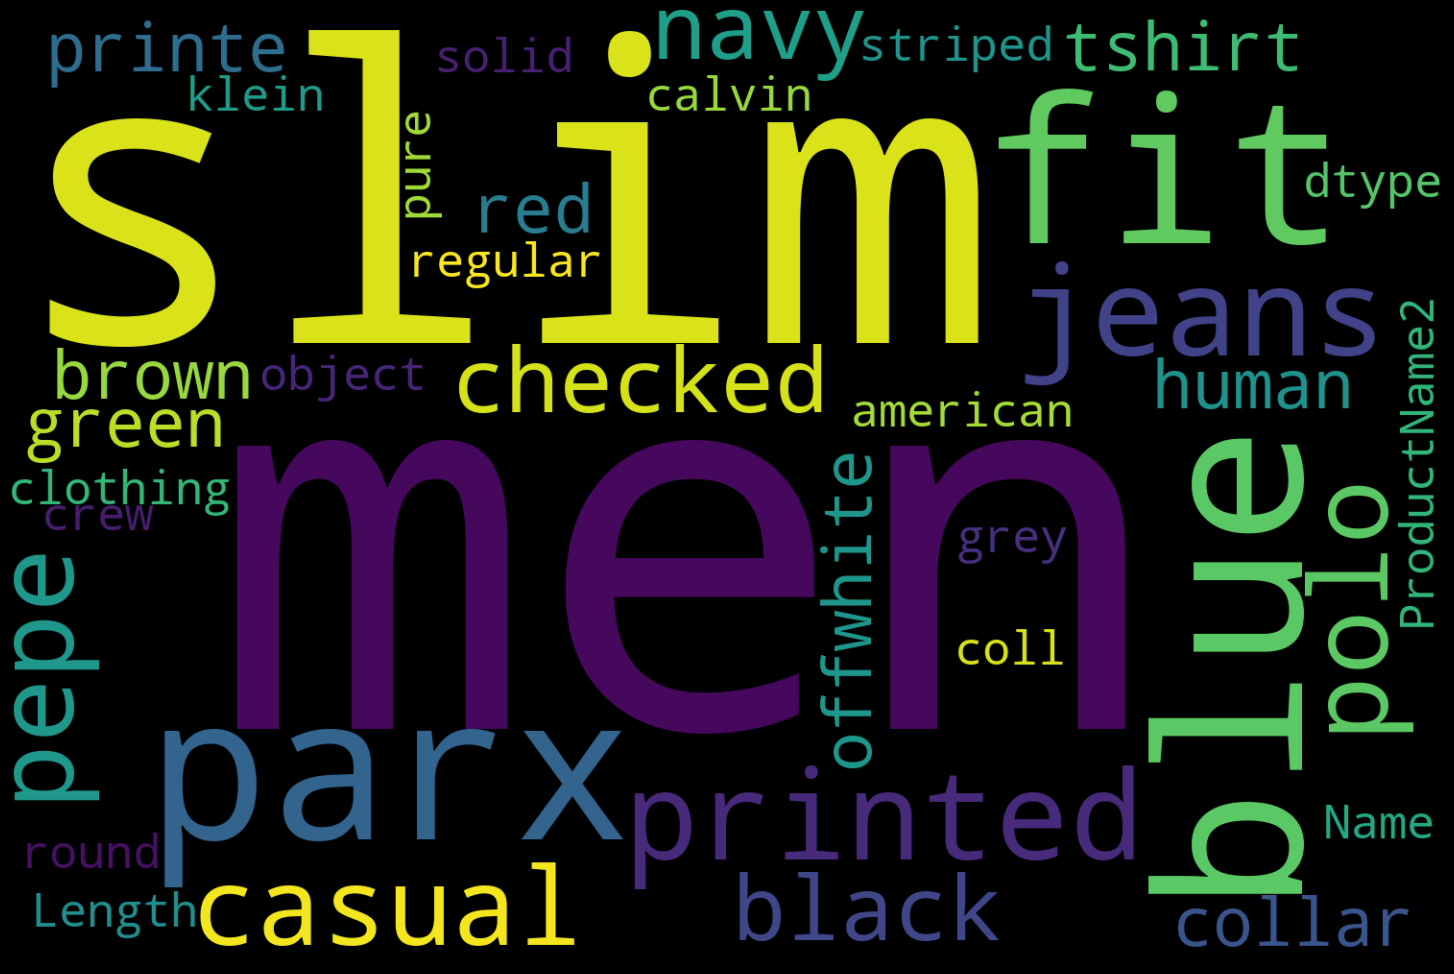

In [59]:
text1_2 = df_shirt['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = list_stopwords).generate(str(text1_2))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

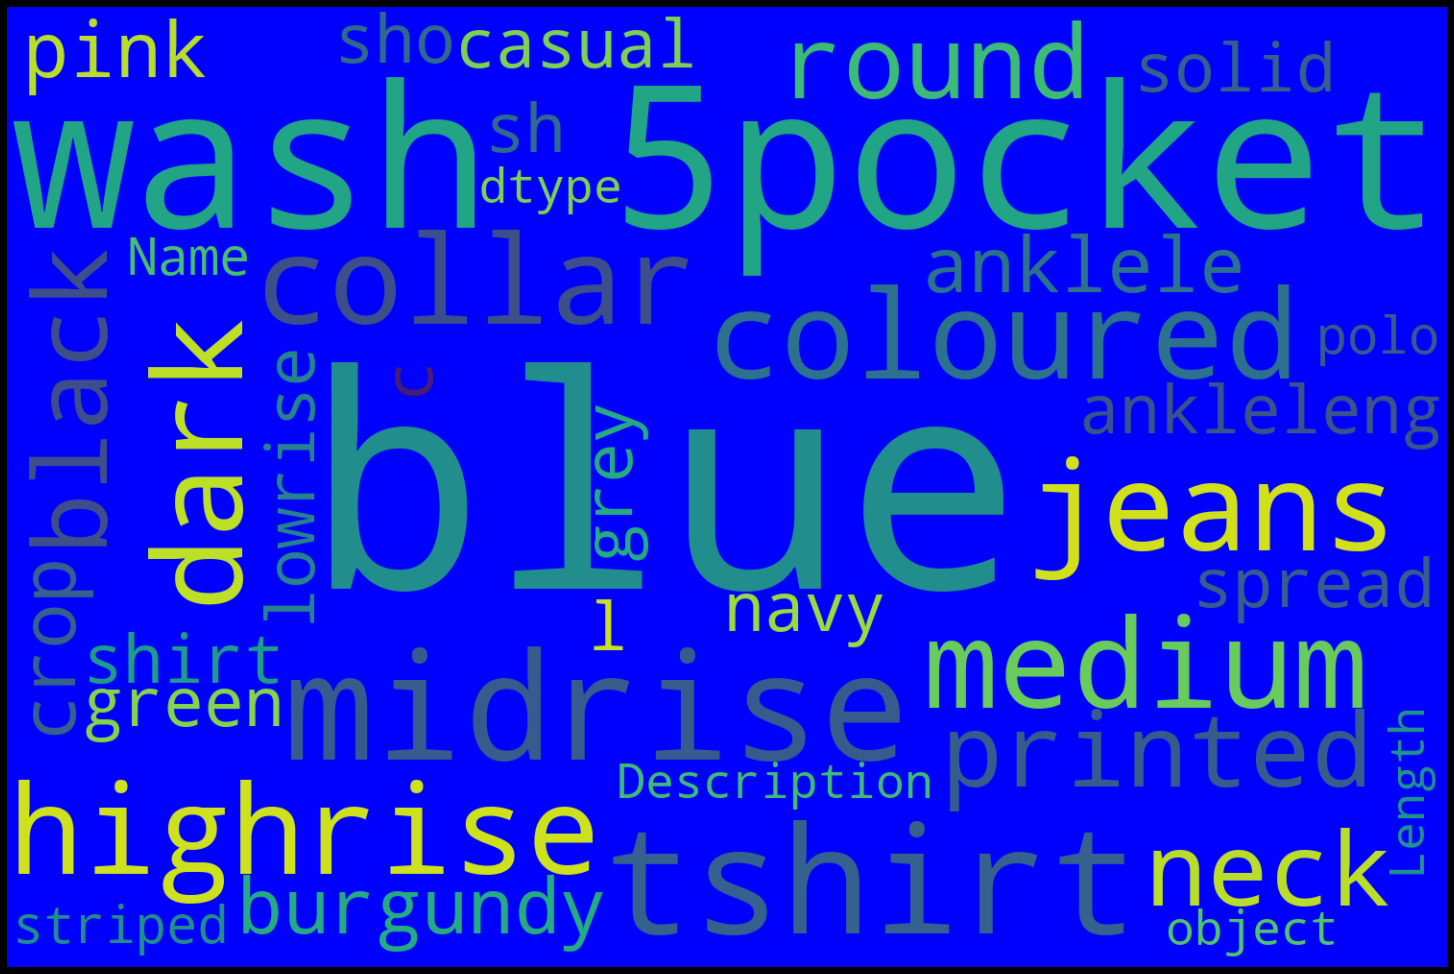

In [60]:
df_jeans=df_nlp[df_nlp['ProductName'].str.contains('jeans|Jeans')]
text2 = df_jeans['Description']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'blue',
    stopwords = list_stopwords).generate(str(text2))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

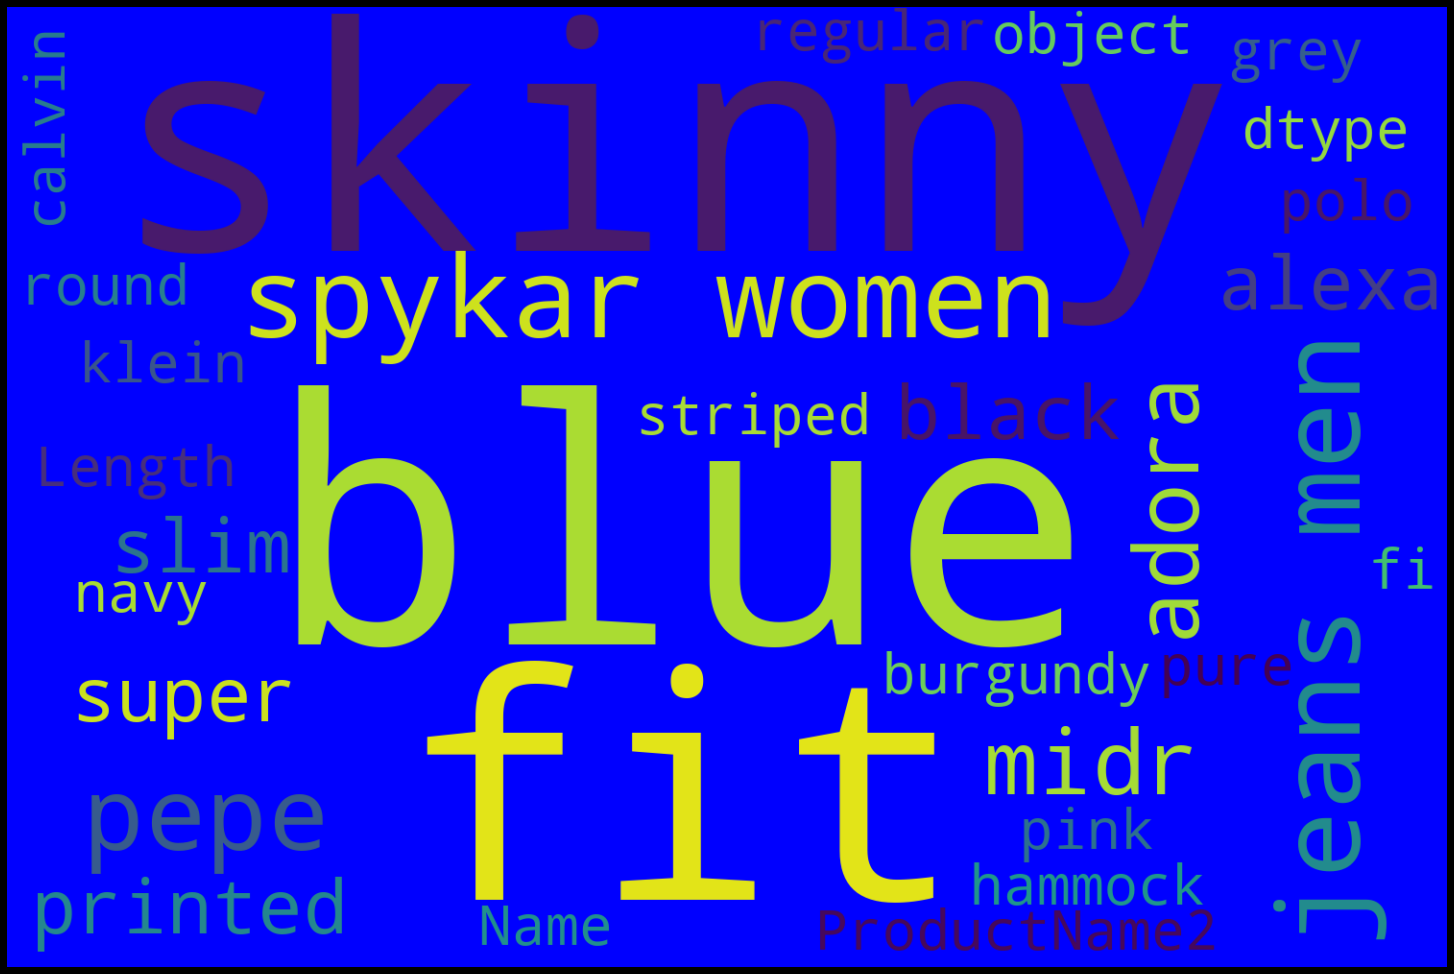

In [61]:
text2_2 = df_jeans['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'blue',
    stopwords = list_stopwords).generate(str(text2_2))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

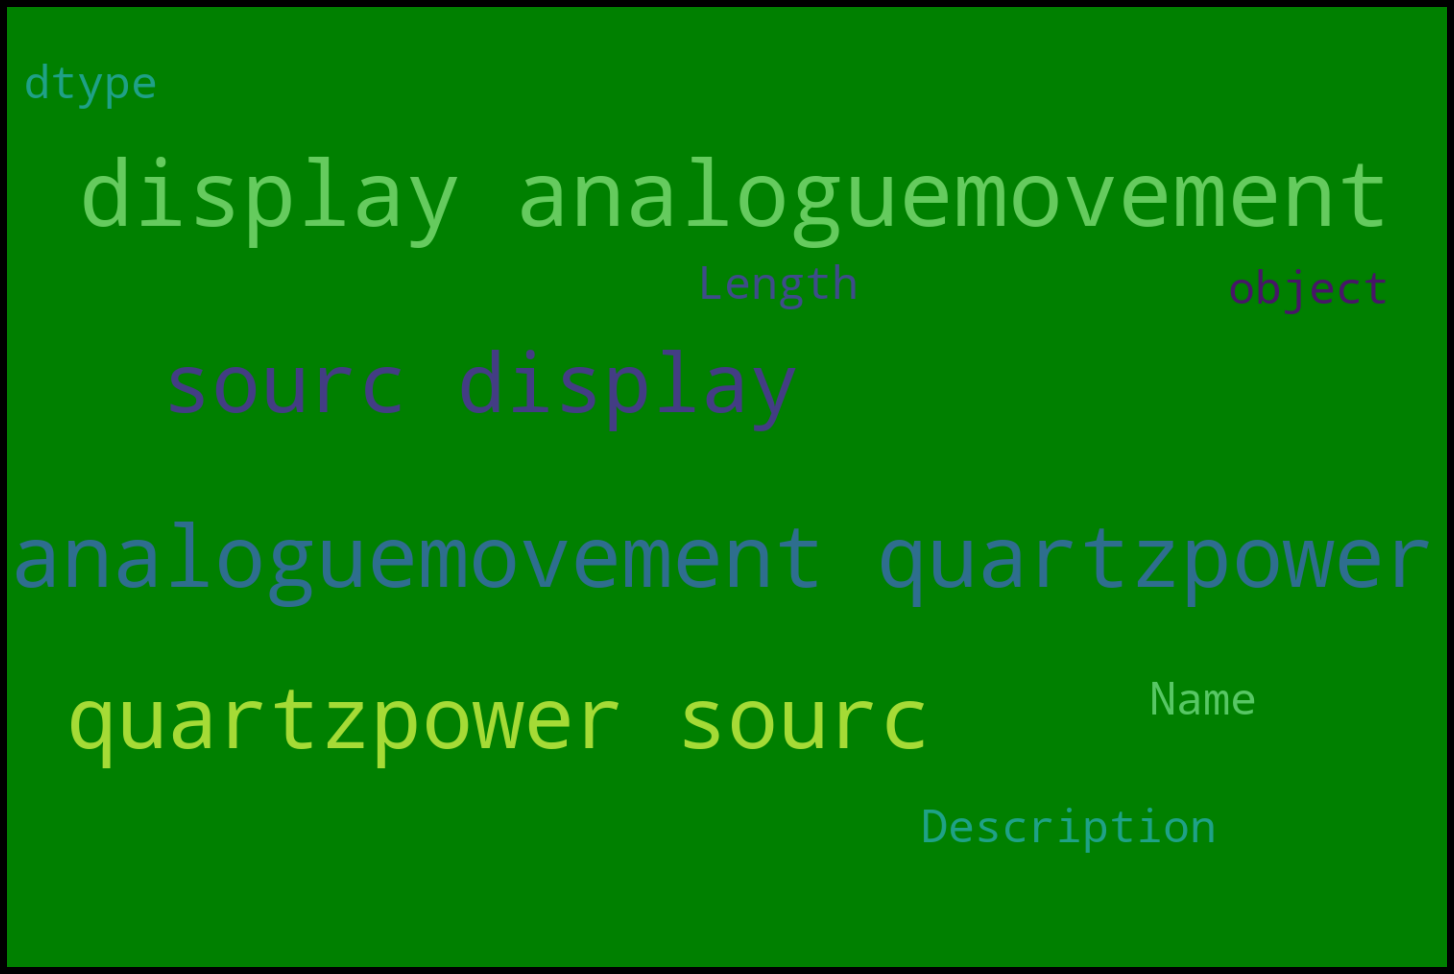

In [62]:
df_watch=df_nlp[df_nlp['ProductName'].str.contains('watch|Watch')]
text3 = df_watch['Description']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'green',
    stopwords = list_stopwords).generate(str(text3))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

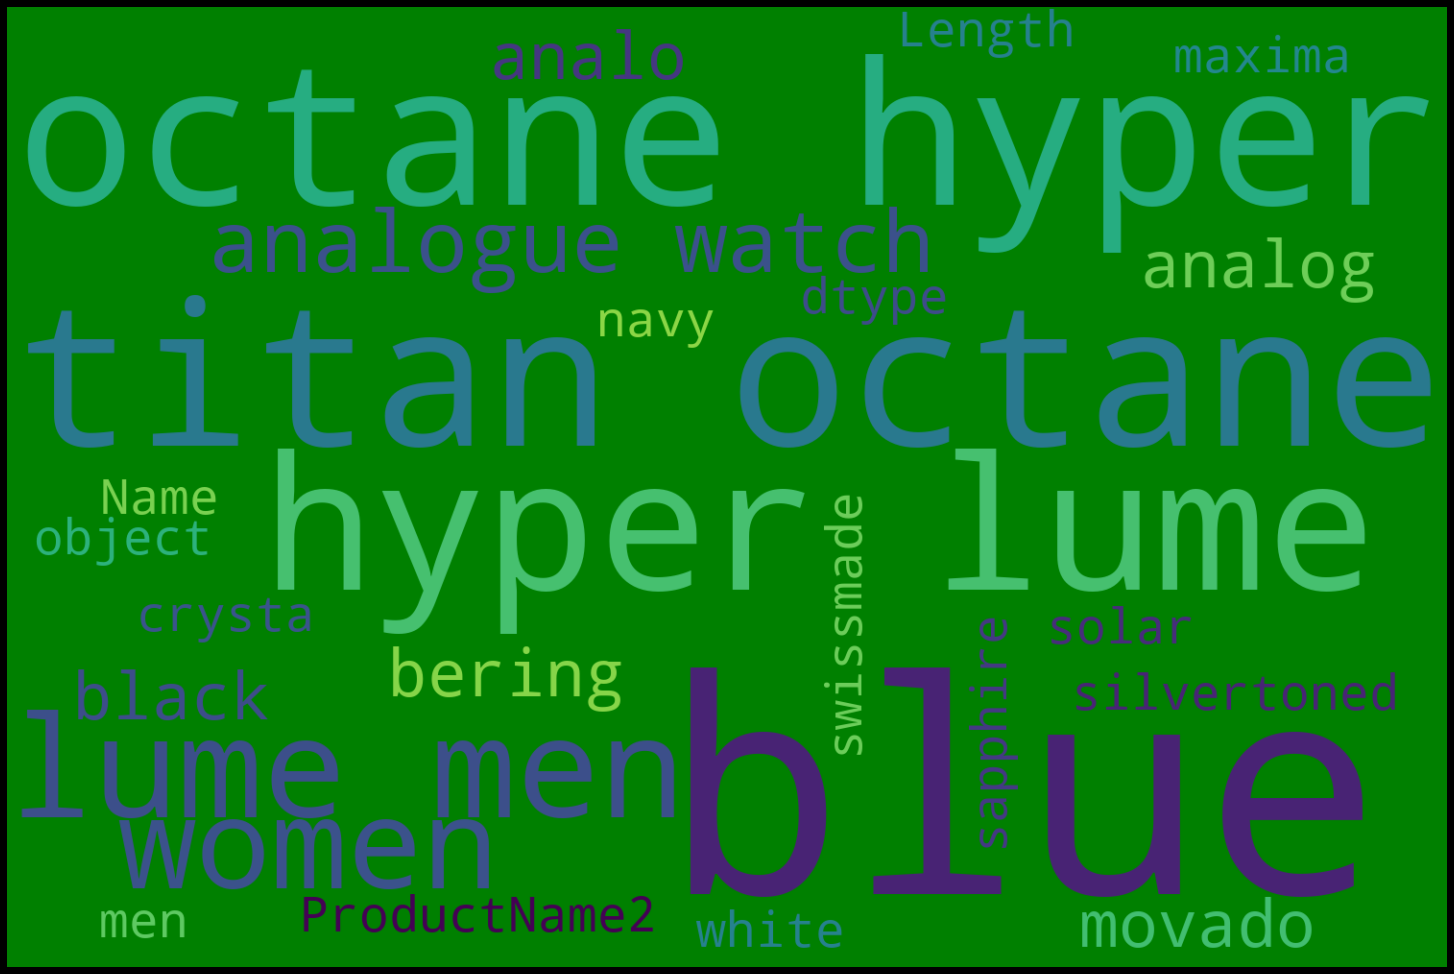

In [63]:
text3_2 = df_watch['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'green',
    stopwords = list_stopwords).generate(str(text3_2))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

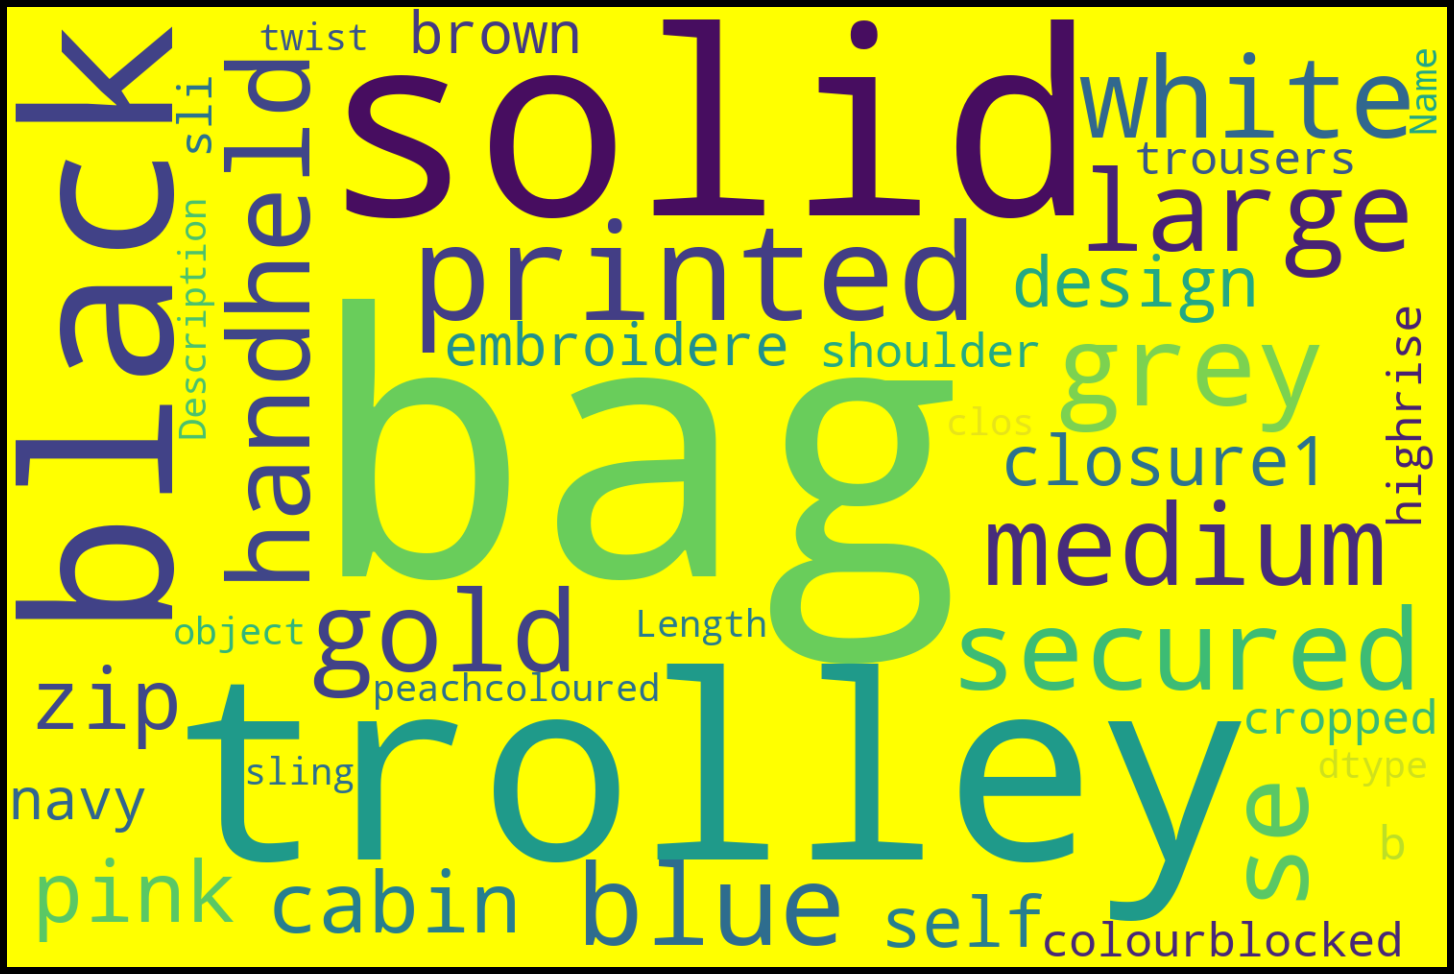

In [64]:
df_bag=df_nlp[df_nlp['ProductName'].str.contains('bag|Bag')]
text4 = df_bag['Description']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'yellow',
    stopwords = list_stopwords).generate(str(text4))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

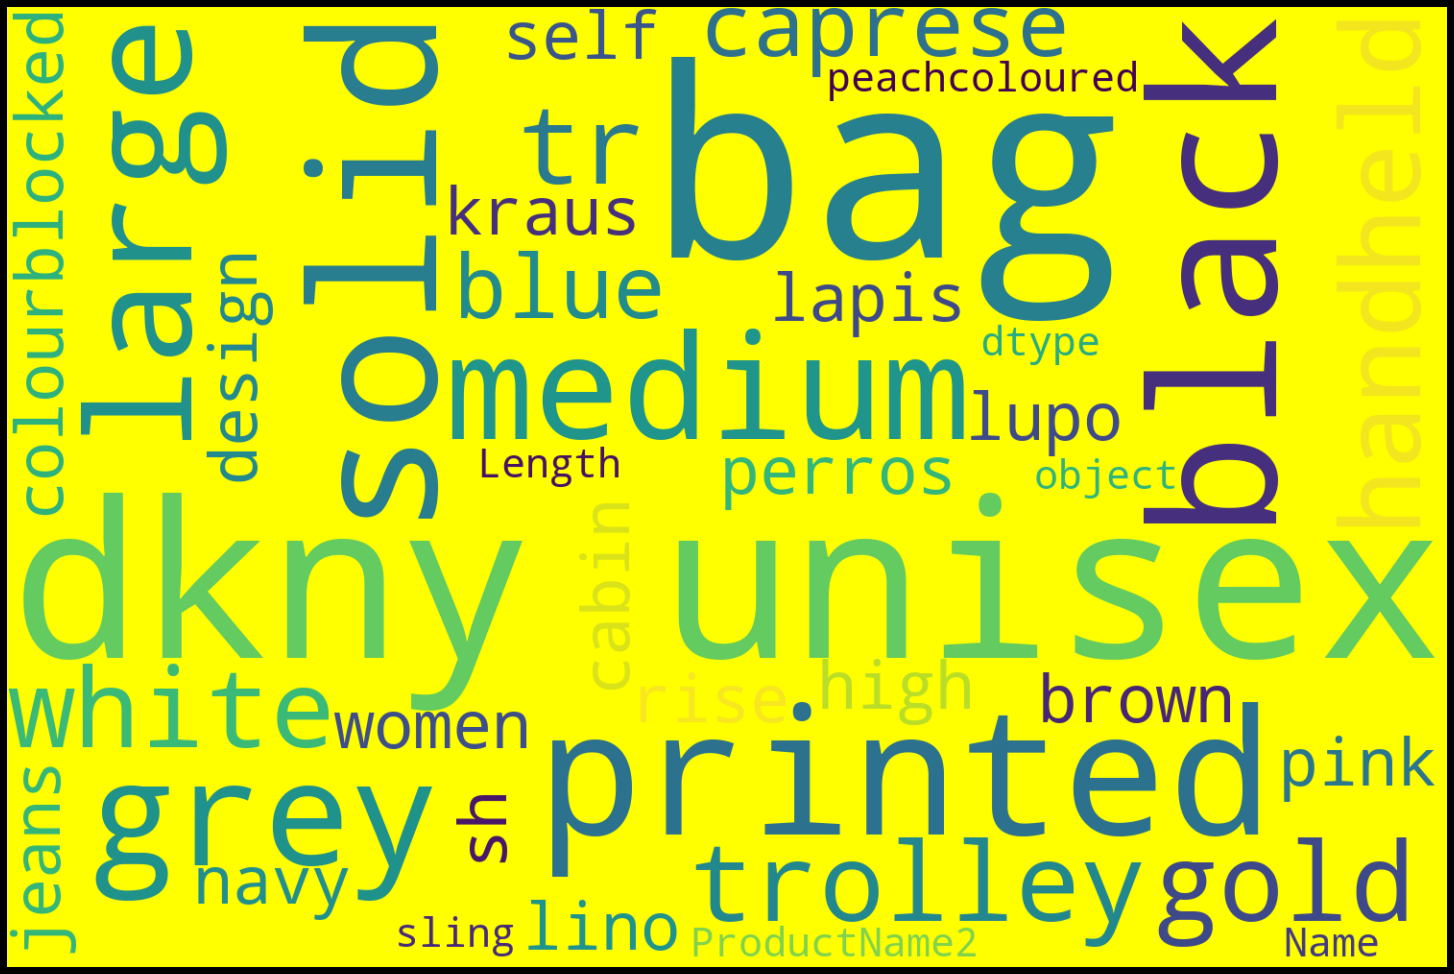

In [65]:
text4_2 = df_bag['ProductName2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'yellow',
    stopwords = list_stopwords).generate(str(text4_2))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()